In [28]:
from PIL import Image, ImageOps
import numpy as np
import cv2
from scipy.fftpack import idct
from os import stat
import matplotlib.pyplot as plt

In [2]:
img = Image.open('nature.jpeg')

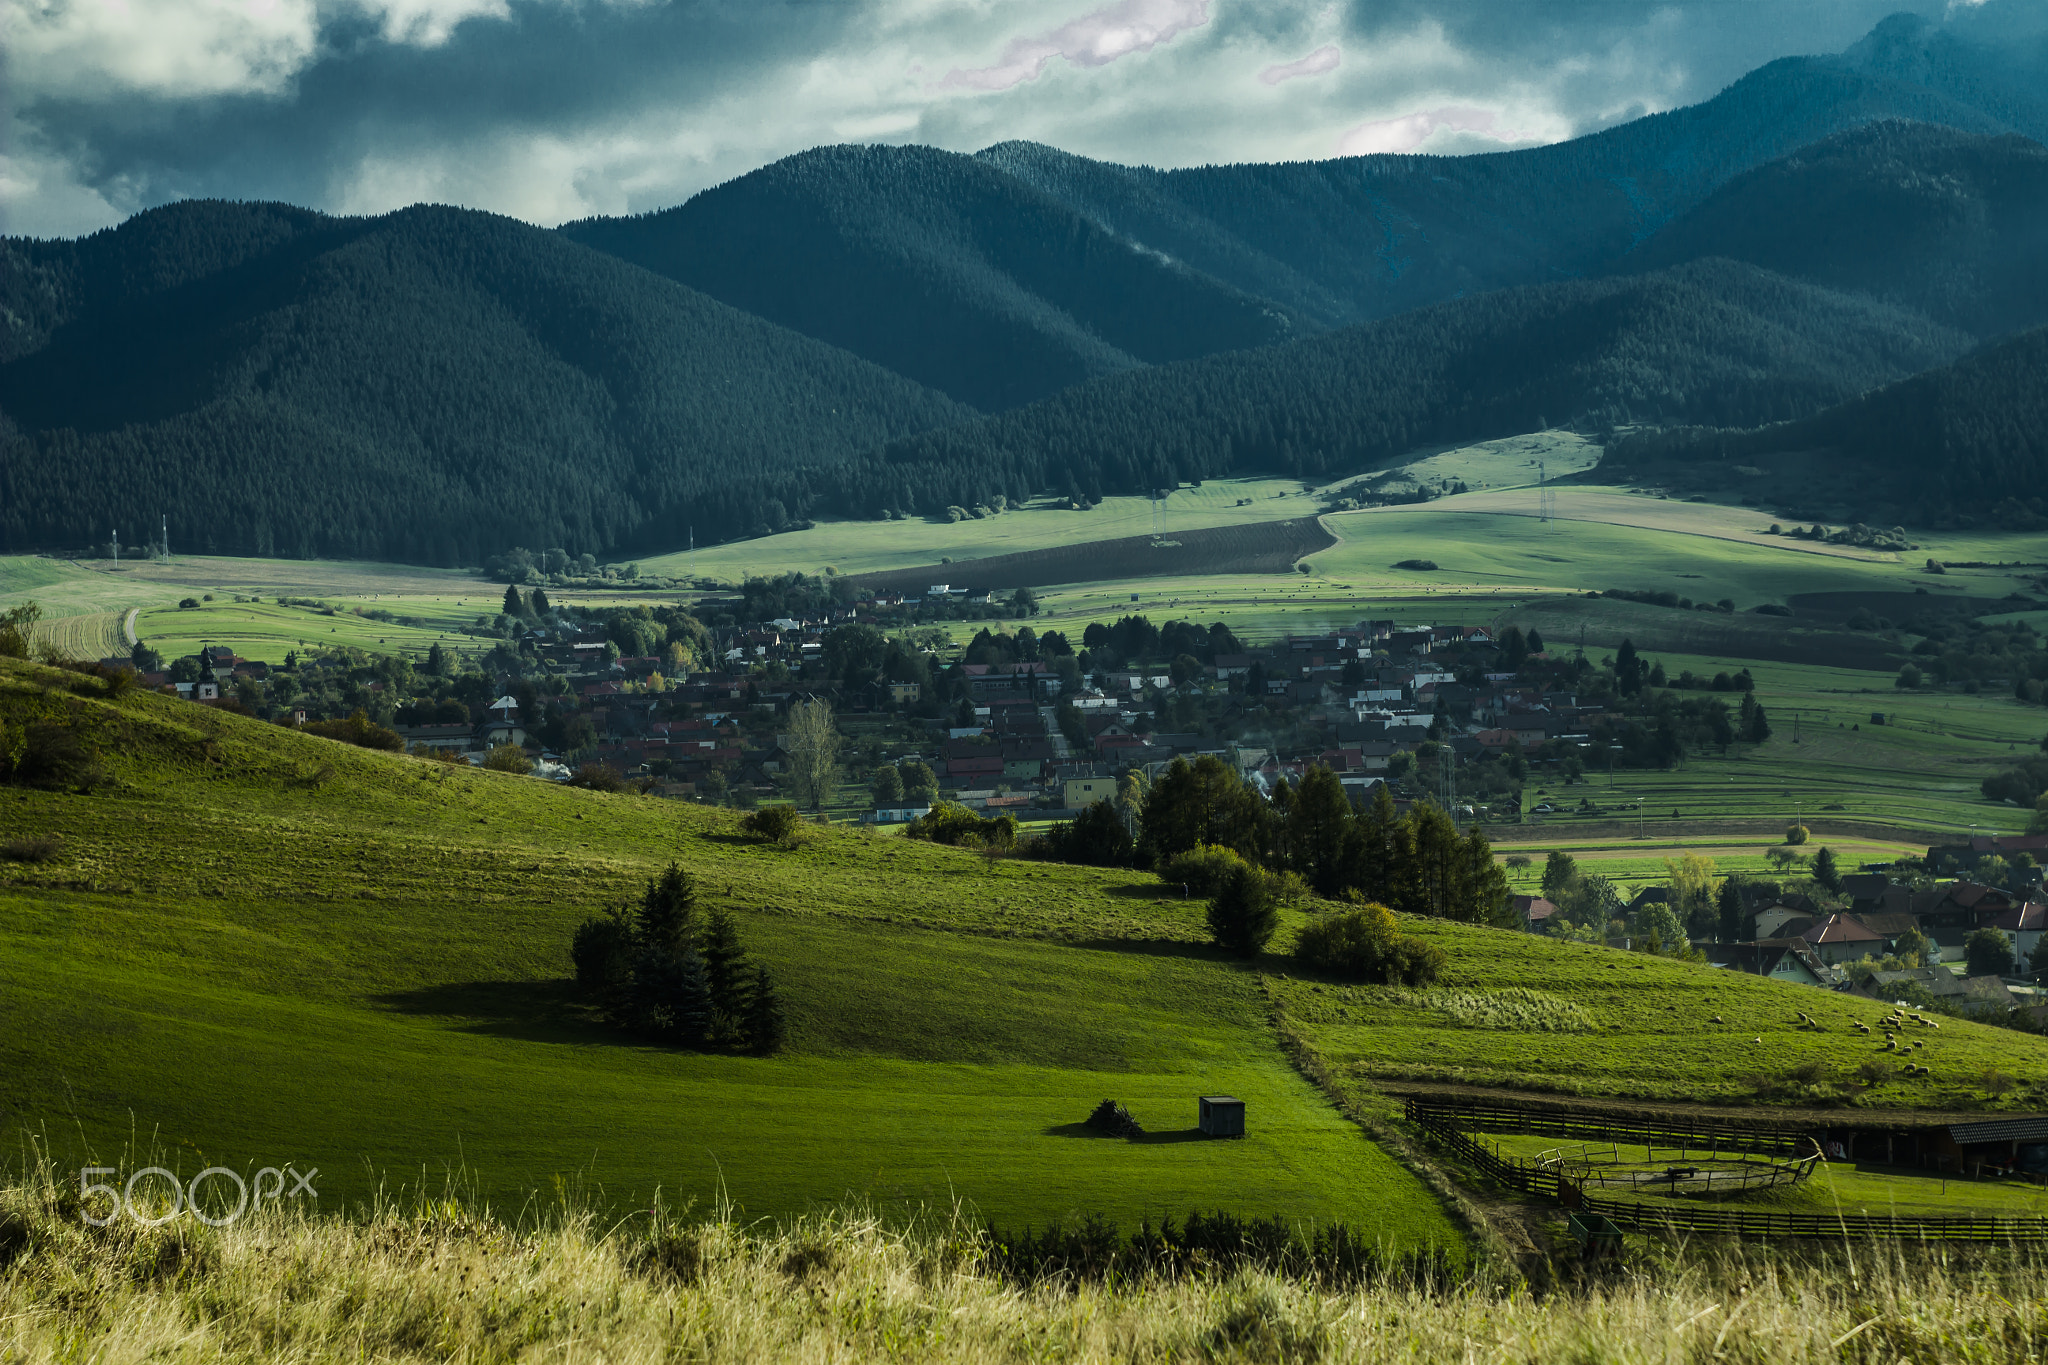

In [3]:
img

In [16]:
img.size

(2048, 1365)

In [4]:
img_ycbcr = img.convert('YCbCr')

In [5]:
subsampling_factor = 2
img_ycbcr_subs = img_ycbcr.resize((img_ycbcr.width // subsampling_factor, img_ycbcr.height // subsampling_factor), resample=Image.BOX)

In [6]:
block_size = 8
quantization_matrix = [
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
]
dct_blocks = []

In [7]:
for i in range(0, img_ycbcr_subs.height, block_size):
    for j in range(0, img_ycbcr_subs.width, block_size):
        block = np.array(img_ycbcr_subs.crop((j, i, j+block_size, i+block_size)).convert('L'))
        block_dct = cv2.dct(np.float32(block))
        block_quantized = (block_dct / quantization_matrix).round().astype(int)
        dct_blocks.append(block_quantized)

In [8]:
img_compressed = Image.new('RGB', (img_ycbcr_subs.width, img_ycbcr_subs.height), color='white')
index = 0
for i in range(0, img_ycbcr_subs.height, block_size):
    for j in range(0, img_ycbcr_subs.width, block_size):
        block_quantized = dct_blocks[index]
        block_dct = (block_quantized * quantization_matrix).astype(float)
        block = Image.fromarray(idct(idct(block_dct.T, norm='ortho').T, norm='ortho'))
        img_compressed.paste(block, (j, i))
        index += 1

In [9]:
type(img_compressed)

PIL.Image.Image

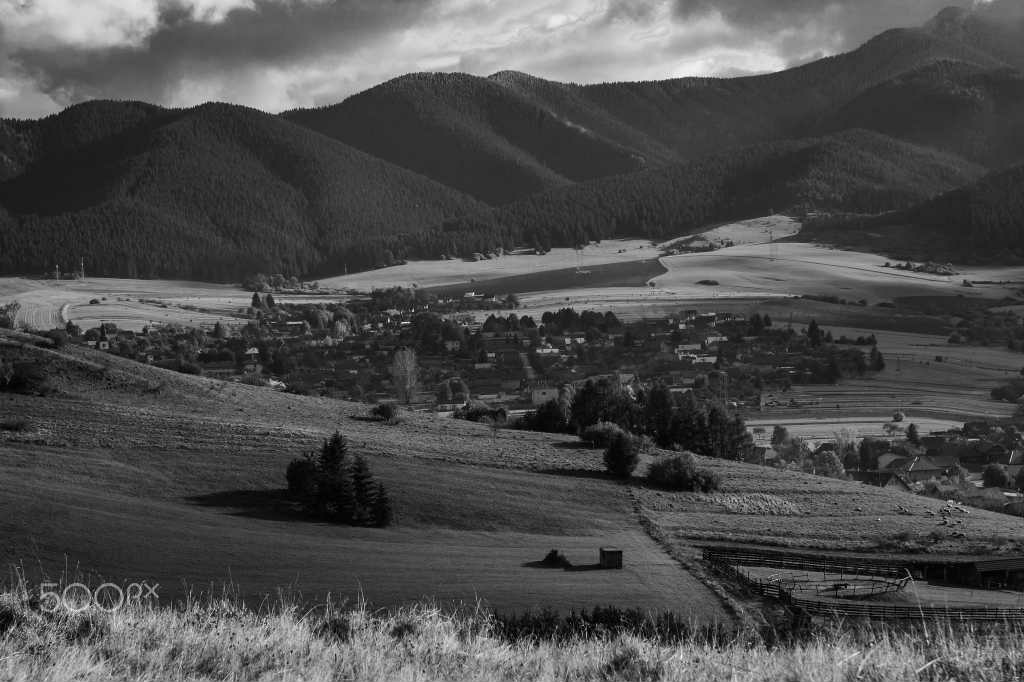

In [30]:
img_compressed

In [13]:
img_compressed.save('compressed_gray.jpeg')

In [17]:
img_compressed.size

(1024, 682)

In [26]:
stat('compressed_gray.jpeg').st_size

98980

In [27]:
stat('nature.jpeg').st_size

1028536